In [33]:
from typing import List

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import ndarray

%matplotlib inline

In [2]:
#seaborn設定
sns.set()
#背景変更
sns.set_style("darkgrid", {'grid.linestyle': '--'})
#大きさ(スケール変更)
sns.set_context("paper")

In [8]:
n=100

def true_func(x: ndarray) -> ndarray:
    z = 1-48*x+218*x**2-315*x**3+145*x**4
    return z 

def linear_func(x: ndarray) -> ndarray:
    z = x
    return z 

No handles with labels found to put in legend.


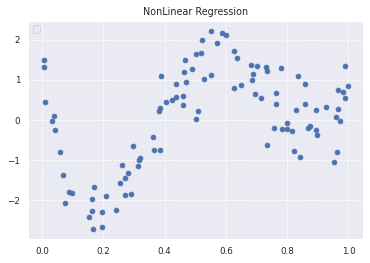

In [9]:
# 真の関数からノイズを伴うデータを生成

# 真の関数からデータ生成
data: ndarray = np.random.rand(n).astype(np.float32)
data = np.sort(data)
target: ndarray = true_func(data)

# 　ノイズを加える
noise: ndarray = 0.5 * np.random.randn(n) 
target = target  + noise

# ノイズ付きデータを描画

plt.scatter(data, target)

plt.title('NonLinear Regression')
plt.legend(loc=2)

0.18274013487053298


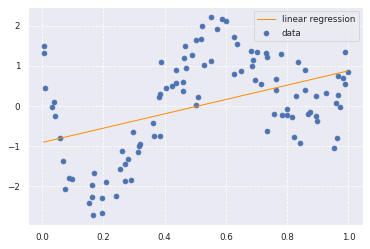

In [11]:
from sklearn.linear_model import LinearRegression

clf: LinearRegression = LinearRegression()
data = data.reshape(-1,1)
target = target.reshape(-1,1)
clf.fit(data, target)

p_lin: ndarray = clf.predict(data)

plt.scatter(data, target, label='data')
plt.plot(data, p_lin, color='darkorange', marker='', linestyle='-', linewidth=1, markersize=6, label='linear regression')
plt.legend()
print(clf.score(data, target))

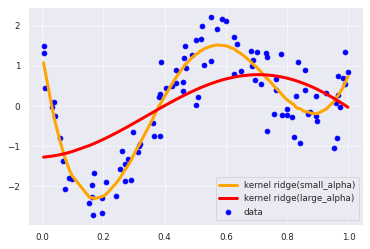

In [22]:
from sklearn.kernel_ridge import KernelRidge
#KernelRidge: L2制約付き最小二乗学習モデル
clf_small_alpha: KernelRidge = KernelRidge(alpha=0.00001, kernel='rbf')
clf_small_alpha.fit(data, target)
p_kridge_small_alpha: ndarray = clf_small_alpha.predict(data)

clf_large_alpha: KernelRidge = KernelRidge(alpha=0.1, kernel='rbf')
clf_large_alpha.fit(data, target)
p_kridge_large_alpha: ndarray = clf_large_alpha.predict(data)

plt.scatter(data, target, color='blue', label='data')

plt.plot(data, p_kridge_small_alpha, color='orange', linestyle='-', linewidth=3, markersize=6, label='kernel ridge(small_alpha)')
plt.plot(data, p_kridge_large_alpha, color='red', linestyle='-', linewidth=3, markersize=6, label='kernel ridge(large_alpha)')
plt.legend()
#plt.plot(data, p, color='orange', marker='o', linestyle='-', linewidth=1, markersize=6)

#L2のalphaが大きい(=罰則が大きい？)とより汎化している


0.7610199557895091


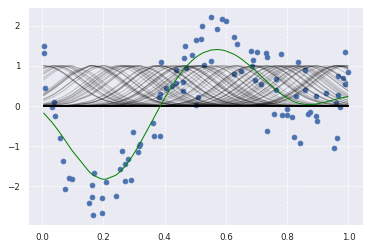

In [29]:
#Ridge

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge

kx: ndarray = rbf_kernel(X=data, Y=data, gamma=50)

clf: Ridge = Ridge(alpha=30)
clf.fit(kx, target)

p_ridge: ndarray = clf.predict(kx)

plt.scatter(data, target,label='data')
for i in range(len(kx)):
    plt.plot(data, kx[i], color='black', linestyle='-', linewidth=1, markersize=3, label='rbf', alpha=0.2)

#plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
plt.plot(data, p_ridge, color='green', linestyle='-', linewidth=1, markersize=3,label='ridge regression')
#plt.legend()

print(clf.score(kx, target))

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

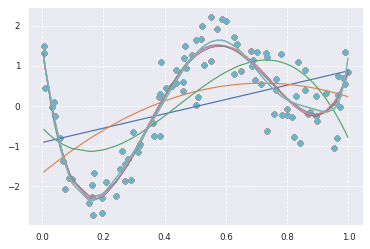

In [36]:
#PolynomialFeatures(degree=1)
#PolynomialFeatures: 多項式と交互作用項項の特徴量を生成
deg: List[int] = [1,2,3,4,5,6,7,8,9,10]

for d in deg:
    regr: Pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=d)),
        ('linear', LinearRegression())
    ])
    regr.fit(data, target)
    # make predictions
    p_poly: ndarray = regr.predict(data)
    # plot regression result
    plt.scatter(data, target, label='data')
    plt.plot(data, p_poly, label='polynomial of degree %d' % (d))

2.220446049250313e-16


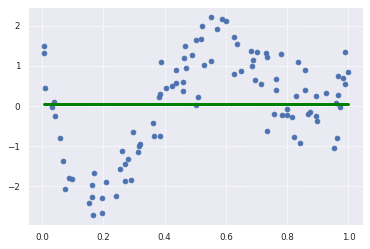

In [44]:
#Lasso

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Lasso

kx: ndarray = rbf_kernel(X=data, Y=data, gamma=5)
#KX = rbf_kernel(X, x)

#lasso_clf = LinearRegression()
lasso_clf: Lasso = Lasso(alpha=100000, max_iter=1000)
lasso_clf.fit(kx, target)

p_lasso: ndarray = lasso_clf.predict(kx)

plt.scatter(data, target)

#plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
plt.plot(data, p_lasso, color='green', linestyle='-', linewidth=3, markersize=3)

print(lasso_clf.score(kx, target))

#正則化が強すぎて直線になっている

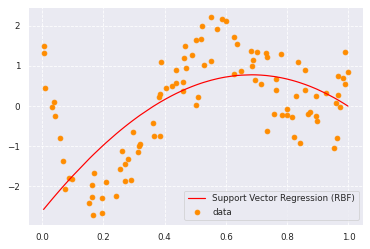

In [49]:
# from sklearn import cross_validation, preprocessing, linear_model, svm
from sklearn import preprocessing, linear_model, svm

#svm.SVR: サポートベクター回帰
# SVR-rbf
clf_svr: svm.SVR = svm.SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1)
clf_svr.fit(data, target)
y_rbf: ndarray = clf_svr.fit(data, target).predict(data)
 
# plot

plt.scatter(data, target, color='darkorange', label='data')
plt.plot(data, y_rbf, color='red', label='Support Vector Regression (RBF)')
plt.legend()
plt.show()